<a href="https://colab.research.google.com/github/KumarADK/AI_DS/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320433  24.789802  23.879981  24.778679  212818400
2015-01-05  23.635286  24.169166  23.448429  24.089084  257142000
2015-01-06  23.637508  23.897774  23.274914  23.699794  263188400
2015-01-07  23.968964  24.069065  23.735391  23.846616  160423600
2015-01-08  24.889904  24.947741  24.180289  24.298189  237458000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0387
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 3.9466e-04
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 4.0023e-04
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.7462e-04
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 3.8514e-04
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 3.5196e-04
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.6461e-04
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 3.0496e-04
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.2565e-04
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 3.1313e-04
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 3.2422e-04
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 2.6418e-04
Epoch 13/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.6208e-04
Epoch 14/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 2.6142e-04
Epoch 15/25
77/77 

[*********************100%***********************]  1 of 1 completed


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step


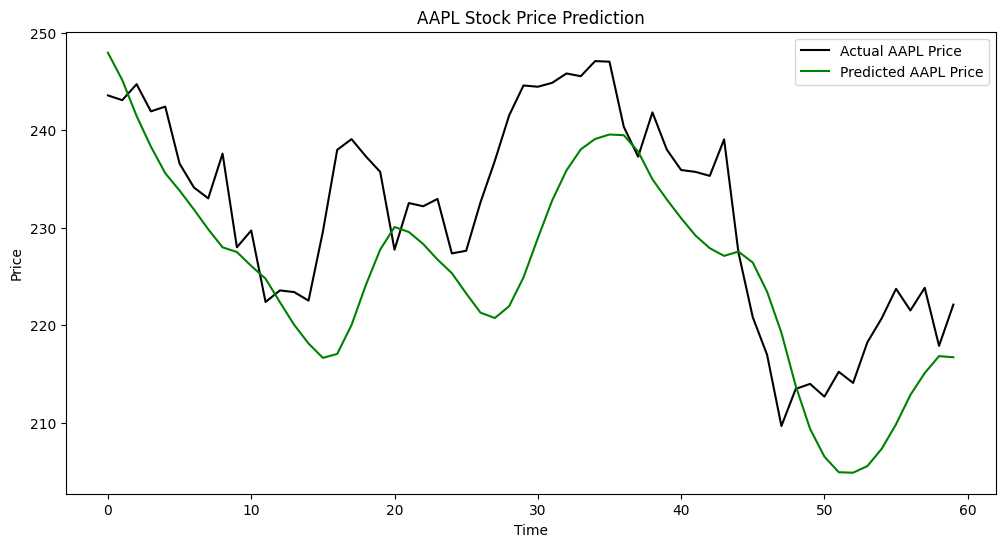

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 1: Load the stock data
ticker = 'AAPL'  # Apple Inc. (change to any ticker)
start_date = '2015-01-01'
end_date = '2024-12-31'

data = yf.download(ticker, start=start_date, end=end_date)
print(data.head())

# Step 2: Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Step 3: Create training dataset
prediction_days = 60  # lookback period
x_train, y_train = [], []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # predicted closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Step 5: Prepare test data
test_start = '2025-01-01'
test_end = '2025-04-01'

test_data = yf.download(ticker, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

full_data = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = full_data[len(full_data) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Step 6: Make predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Step 7: Plot results
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='black', label=f"Actual {ticker} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {ticker} Price")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
from operator import ipow
import numpy as np
import pandas as pd

#set random seed for reproducibility
np.random.seed(105)

#generate synthetic dtata(1000 sample)
IPO = np.random.randint(900,9000,1000)
s = np.random.randint(3,12,1000)
location = np.random.randint(3, 22,1000)
age = np.random.randint(3,91,1000)

# Generate House Prices with some noise
price =(size * 300) + (bedrooms * 50000) + (location * 20000) - (age * 2000) + np.random.randint(-20000,20000,1000)

# Create DataFrame
df = pd.DataFrame({"Size": size,"Bedrooms": bedrooms,"Location": location,"Age": age,"Price": price})

# Save to csv
csv_filename ="stock_prices.csv"
df.to_csv(csv_filename,index=False)

print(f" dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("stock_prices.csv")  # Replace with your file name
print("Dataset Loaded")

# Convert Date column to datetime if available
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Use only closing price and date for prediction
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Features (X) and target (y)
X = df[['Date_ordinal']]  # Independent variable
y = df['Close']           # Dependent variable

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], y, color='blue', label='Actual Prices')
plt.plot(df['Date'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.grid()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'stock_prices.csv'

In [2]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
n = 200

# Generate synthetic stock features
data = pd.DataFrame({
    'Open': np.random.uniform(100, 500, n),
    'High': np.random.uniform(100, 500, n),
    'Low': np.random.uniform(90, 490, n),
    'Close': np.random.uniform(100, 500, n),
    'Volume': np.random.randint(1_000_000, 10_000_000, n),
    'SMA_10': np.random.uniform(100, 500, n),
    'EMA_10': np.random.uniform(100, 500, n),
    'RSI': np.random.uniform(0, 100, n),
    'MACD': np.random.uniform(-5, 5, n),
    'ATR': np.random.uniform(1, 10, n),
    'DayOfWeek': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], n),
    'Month': np.random.randint(1, 13, n)
})

# Add a custom feature: percent change from Open to Close
data['PriceChange%'] = ((data['Close'] - data['Open']) / data['Open']) * 100

# Define the target variable based on price movement and volatility
def classify_price_movement(row):
    change = row['PriceChange%']
    atr = row['ATR']

    if abs(change) < 0.2:
        return 'No Change'
    elif abs(change) > 3 and atr > 7:
        return 'Volatile'
    elif change > 0:
        return 'Up'
    else:
        return 'Down'

data['Market_Trend'] = data.apply(classify_price_movement, axis=1)

# Preview the dataset
print(data.head())

# Optional: Save to CSV
data.to_csv("synthetic_stock_data.csv", index=False)


         Open        High         Low       Close   Volume      SMA_10  \
0  249.816048  356.812658  131.249548  167.574025  1890695  427.640927   
1  480.285723  133.655986  451.021163  211.436136  1838761  419.766352   
2  392.797577  164.651486  292.100949  170.804194  8367664  377.878588   
3  339.463394  459.421675  420.582986  135.481014  9888923  208.858055   
4  162.407456  342.571624  218.019840  148.254348  6352825  336.092267   

       EMA_10        RSI      MACD       ATR DayOfWeek  Month  PriceChange%  \
0  383.268835  45.378954  2.175978  5.665672       Mon      8    -32.921033   
1  126.940241  23.605046  1.924362  2.351521       Thu      2    -55.977010   
2  332.868184   7.349675  4.912560  7.636904       Mon      6    -56.515976   
3  238.353223  16.975791 -3.716057  5.609997       Thu      3    -60.089654   
4  348.366207  51.977395 -3.958904  7.122050       Thu     12     -8.714568   

  Market_Trend  
0         Down  
1         Down  
2     Volatile  
3         Do

Classification Report:
              precision    recall  f1-score   support

        Down       1.00      1.00      1.00         6
          Up       1.00      1.00      1.00        17
    Volatile       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



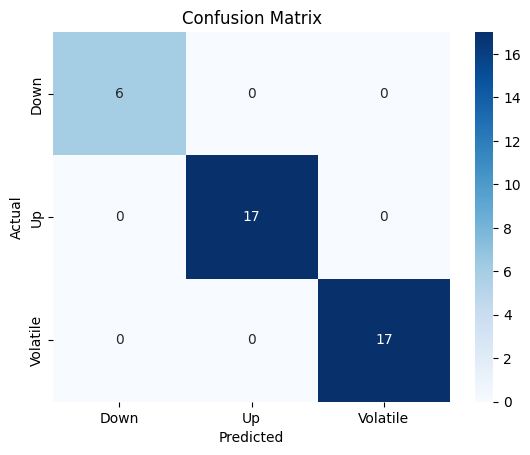

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the synthetic dataset
data = pd.read_csv("synthetic_stock_data.csv")

# Step 2: Encode categorical features
data['DayOfWeek'] = LabelEncoder().fit_transform(data['DayOfWeek'])

# Step 3: Define features (X) and target (y)
X = data.drop(['Market_Trend'], axis=1)
y = data['Market_Trend']

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
